### TO DO

- Manual std_dev review
- Clustering by attribute - count_matrix + k-means - one cluster for each attirbute - check intra-cluster distance
- Clustering by attribute - word2vec + clustering - intra-cluster distance

### Part 1 - Manual std_dev review

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [2]:
# Pseudo-Clustering labels to generate a homogenity score

# Read the most recent text report

df = pd.read_excel("current_text_reports/Annotation_text_04-30-2021.xlsx")

In [4]:
df.columns = df.loc[0,:]
df = df.iloc[1:, :]

In [5]:
df.head()

,tag,owner,document,phrase,page,location
1,VAT-Expense-Frequency,Piyush,Unable to add base rent expense period start d...,monthly,1,https://klondike.cbre.cloud/labeler?identifier...
2,VAT-Expense-Comment,Piyush,Unable to add base rent expense period start d...,Rental . The monthly rental for the Premises (...,1,https://klondike.cbre.cloud/labeler?identifier...
3,VAT-Expense-Comment,Piyush,Unable to add base rent expense period start d...,2 . Lease shall be the sum of Three Thousand D...,1,https://klondike.cbre.cloud/labeler?identifier...
4,VAT-Absolute-Expense-Amount,Piyush,Unable to add base rent expense period start d...,"$ 3,210.00",1,https://klondike.cbre.cloud/labeler?identifier...
5,Utilities-Relative-Expense-Start-Date,Amirah,Coyee/PH3; Couldn't capture OPEX clause.,Commencement Date,7,https://klondike.cbre.cloud/labeler?identifier...


In [6]:
# Create a homogenity metric based on number of words, punctuation and special characters

# No of words

df["no_of_words"] = df["phrase"].apply(lambda x: len(re.findall(r'\w+', x)))

In [7]:
# No of punctuations

df["no_of_punct"] = df["phrase"].apply(lambda x: len(re.findall(r"[!\"#$%&'()*+,\-./:;<=>?@[\]^_`{|}~]", x)))

In [8]:
# Total length
df["total_length"] = df["phrase"].apply(lambda x: len(x))

In [9]:
# No of digits
df["no_of_digits"] = df["phrase"].apply(lambda x: sum(c.isdigit() for c in x))

In [10]:
df.head()

,tag,owner,document,phrase,page,location,no_of_words,no_of_punct,total_length,no_of_digits
1,VAT-Expense-Frequency,Piyush,Unable to add base rent expense period start d...,monthly,1,https://klondike.cbre.cloud/labeler?identifier...,1,0,7,0
2,VAT-Expense-Comment,Piyush,Unable to add base rent expense period start d...,Rental . The monthly rental for the Premises (...,1,https://klondike.cbre.cloud/labeler?identifier...,17,3,103,0
3,VAT-Expense-Comment,Piyush,Unable to add base rent expense period start d...,2 . Lease shall be the sum of Three Thousand D...,1,https://klondike.cbre.cloud/labeler?identifier...,45,6,241,2
4,VAT-Absolute-Expense-Amount,Piyush,Unable to add base rent expense period start d...,"$ 3,210.00",1,https://klondike.cbre.cloud/labeler?identifier...,3,3,10,6
5,Utilities-Relative-Expense-Start-Date,Amirah,Coyee/PH3; Couldn't capture OPEX clause.,Commencement Date,7,https://klondike.cbre.cloud/labeler?identifier...,2,0,17,0


In [11]:
import statistics as sts
import numpy as np

In [12]:
# Generate std deviation metrics for each column for each attribute

feature_list = ["attribute"] + list(df.columns)[6:]
deviation_matrix = pd.DataFrame(0, index=np.arange(len(set(df["tag"]))), columns=feature_list)
i,j = 0,0

for attribute in set(df["tag"]):
    try:
        words_stdev = sts.stdev(df.loc[df["tag"] == attribute, "no_of_words"])
        punct_stdev = sts.stdev(df.loc[df["tag"] == attribute, "no_of_punct"])
        length_stdev = sts.stdev(df.loc[df["tag"] == attribute, "total_length"])
        digits_stdev = sts.stdev(df.loc[df["tag"] == attribute, "no_of_digits"])
    except:
        #print(len(df.loc[df["tag"] == attribute, "no_of_words"]))
        words_stdev = 0
        punct_stdev = 0
        length_stdev = 0
        digits_stdev = 0
    deviation_matrix.iloc[i,j] = attribute
    j += 1
    deviation_matrix.iloc[i,j] = words_stdev
    j += 1
    deviation_matrix.iloc[i,j] = punct_stdev
    j += 1
    deviation_matrix.iloc[i,j] = length_stdev
    j += 1
    deviation_matrix.iloc[i,j] = digits_stdev
    i += 1
    j = 0
    
    

In [13]:
deviation_matrix["composite_score"] = deviation_matrix["no_of_words"]*0.6 +  deviation_matrix["no_of_punct"]*0.05 + \
deviation_matrix["total_length"]*0.3 +  deviation_matrix["no_of_digits"]*0.05

In [15]:
deviation_matrix

,attribute,no_of_words,no_of_punct,total_length,no_of_digits,composite_score
0,Lessee-Contact-Location-Name,0.812949,0.445666,4.559687,0.777686,1.916843
1,TT-Cancel-Break-Relative-Option-Notice-End-Date,3.766962,1.194432,20.782765,1.614517,8.635454
2,Relative-Execution-Date,4.341088,0.628181,25.340912,0.520875,10.264379
3,Sales-Tax-Expense-Frequency,0.421637,0.000000,2.065591,0.000000,0.872660
4,ROFO-Relative-Option-Notice-End-Date,11.437578,3.389824,68.247810,1.044466,27.558604
...,...,...,...,...,...,...
334,Purchase-Relative-Option-Effective-End-Date,0.000000,0.000000,0.000000,0.000000,0.000000
335,Abatement-Expense-Frequency,0.000000,0.000000,0.816497,0.000000,0.244949
336,Page-Number,1.285210,0.440143,4.017023,0.500196,2.023250
337,Abatement-Relative-Expense-Amount,2.959247,0.966092,16.800227,1.374946,6.932668


In [24]:
deviation_matrix.sort_values(by = "composite_score", ascending = True).loc[(deviation_matrix["composite_score"] != 0.0), ["attribute", "composite_score"]][:20]

,attribute,composite_score
317,Lessee-Broker-Contact-Postal-Code,0.074620
258,Lessee-Notice-Contact-POBox,0.110679
127,Lessor-Broker-Contact-Postal-Code,0.120523
335,Abatement-Expense-Frequency,0.244949
108,Billing-Address-Name,0.346410
89,TT-Cancel-Break-Absolute-Option-Effective-Star...,0.352077
42,Remittance-Location-Name,0.356080
297,Billing-Address-City,0.379473
281,Property-Postal-Code,0.461883
200,Property-Manager-Contact-City,0.474342


### Part 2 - count_matrix + clustering

In [5]:
df["phrase"]

1                                                  monthly
2        Rental . The monthly rental for the Premises (...
3        2 . Lease shall be the sum of Three Thousand D...
4                                               $ 3,210.00
5                                        Commencement Date
                               ...                        
28046                                                 0.00
28047                                               $ 0.00
28048                                               $ 0.00
28049                                               $ 0.00
28050                                               $ 0.00
Name: phrase, Length: 28050, dtype: object

In [12]:
len(df)

28050

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [21]:
vectorizer.fit(df["phrase"])

CountVectorizer()

In [22]:
len(vectorizer.vocabulary_)

8961

### For full dataset first

In [23]:
# encode document
vector = vectorizer.transform(df["phrase"])
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(28050, 8961)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [13]:
label_to_cluster_mapping = {label : cluster for cluster, label in enumerate(df["tag"].unique())}

In [14]:
label_to_cluster_mapping

{'VAT-Expense-Frequency': 0,
 'VAT-Expense-Comment': 1,
 'VAT-Absolute-Expense-Amount': 2,
 'Utilities-Relative-Expense-Start-Date': 3,
 'Utilities-Relative-Expense-Amount': 4,
 'Utilities-Expense-Period-Start-Date': 5,
 'Utilities-Expense-Frequency': 6,
 'Utilities-Absolute-Expense-Start-Date': 7,
 'Utilities-Absolute-Expense-Amount': 8,
 'TT-Rolling-Cancel-Break-Relative-Option-Notice-End-Date': 9,
 'TT-Rolling-Cancel-Break-Relative-Option-Effective-Start-Date': 10,
 'TT-Rolling-Cancel-Break-Relative-Option-Effective-End-Date': 11,
 'TT-Rolling-Cancel-Break-Option-is-Conditional': 12,
 'TT-Rolling-Cancel-Break-Option-Penalty': 13,
 'TT-Rolling-Cancel-Break-Option-Is-Conditional': 14,
 'TT-Rolling-Cancel-Break-Option-Comment': 15,
 'TT-Rolling-Cancel-Break-Absolute-Option-Effective-Start-Date': 16,
 'TT-Rolling-Cancel-Break-Absolute-Option-Effective-End-Date': 17,
 'TT-Cancel-Break-Relative-Option-Notice-Start-Date': 18,
 'TT-Cancel-Break-Relative-Option-Notice-End-Date': 19,
 'TT-Can

In [45]:
# Performing k-means clustering, but the ideal clusters are already known. Hence we do clustering with k=1 for each cluster
# and record the intra-cluster distance as a measure of quality

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 3,
    "max_iter": 30,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):     
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(vector)
    sse.append(kmeans.inertia_)

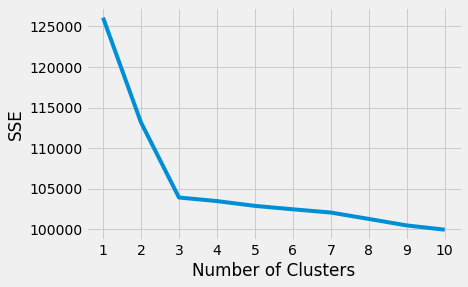

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [25]:
# Using 3 clusters
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=4,
    max_iter=50,
    random_state=42
)

In [26]:
kmeans.fit(vector)

KMeans(init='random', max_iter=50, n_clusters=3, n_init=4, random_state=42)

In [27]:
kmeans.labels_

array([2, 1, 1, ..., 2, 2, 2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28050 samples in 0.001s...
[t-SNE] Computed neighbors for 28050 samples in 17.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28050
[t-SNE] Computed conditional probabilities for sample 2000 / 28050
[t-SNE] Computed conditional probabilities for sample 3000 / 28050
[t-SNE] Computed conditional probabilities for sample 4000 / 28050
[t-SNE] Computed conditional probabilities for sample 5000 / 28050
[t-SNE] Computed conditional probabilities for sample 6000 / 28050
[t-SNE] Computed conditional probabilities for sample 7000 / 28050
[t-SNE] Computed conditional probabilities for sample 8000 / 28050
[t-SNE] Computed conditional probabilities for sample 9000 / 28050
[t-SNE] Computed conditional probabilities for sample 10000 / 28050
[t-SNE] Computed conditional probabilities for sample 11000 / 28050
[t-SNE] Computed conditional probabilities for sample 12000 / 28050
[t-SNE] Computed conditional probabilities for sa

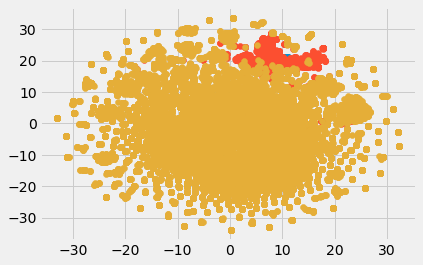

In [30]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne = tsne_model.fit_transform(vector)
tsne = pd.DataFrame(tsne)
tsne['k'] = kmeans.labels_

for cluster in np.unique(kmeans.labels_): # plot data by cluster
    plt.scatter(x=tsne.where(tsne['k']==cluster)[0],
                y=tsne.where(tsne['k']==cluster)[1]
               )

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

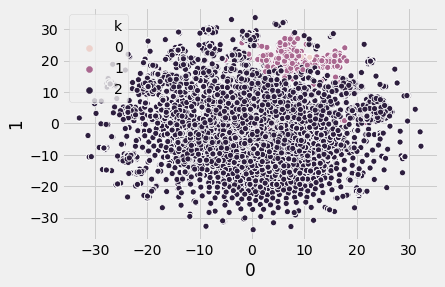

In [33]:
sns.scatterplot(tsne[0], tsne[1], hue = tsne.k)
sns.color_palette("Paired")

In [35]:
from sklearn.decomposition import PCA

In [37]:
# Visualizing using PCA
pca_df = pd.DataFrame()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(vector.todense())
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.20208647 0.0323847 ]


In [39]:
pca_df["Colors"] = kmeans.labels_

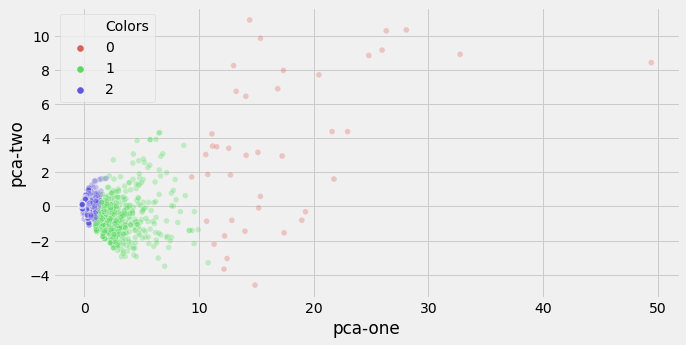

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Colors",
    palette=sns.color_palette("hls", 3),
    data=pca_df,
    #palette=sns.color_palette('coolwarm', n_colors=3), 
    legend="full",
    alpha=0.3
)

In [45]:
df["First_clustering"] = kmeans.labels_

In [47]:
df['Segment'] = df['First_clustering'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28050 entries, 1 to 28050
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   tag               28050 non-null  object  
 1   owner             28050 non-null  object  
 2   document          28050 non-null  object  
 3   phrase            28050 non-null  object  
 4   page              28050 non-null  object  
 5   location          28050 non-null  object  
 6   First_clustering  28050 non-null  int32   
 7   Segment           28050 non-null  category
dtypes: category(1), int32(1), object(6)
memory usage: 1.4+ MB


In [54]:
df.groupby('Segment').agg(
    {
        'tag': lambda x: x.value_counts().index[0],
        'owner': lambda x: x.value_counts().index[0],
        'phrase': lambda x: x.value_counts().index[0],
        'location' : "count"
    }
).reset_index()

,Segment,tag,owner,phrase,location
0,First,Clause-Surrender-Or-Reinstatement,Eric,Tenant may extend the Term of this Lease for o...,41
1,Second,Relative-Execution-Date,Amirah,the first day of each month,1401
2,Third,Lessee-Contact-Organization,Amirah,monthly,26608


In [56]:
df.loc[df["Segment"] == "First" ]

,tag,owner,document,phrase,page,location,First_clustering,Segment
740,Renewal-Option-is-Conditional,Amirah,Amirah,provided that this Lease is in full force and ...,5,https://klondike.cbre.cloud/labeler?identifier...,0,First
749,Renewal-Option-Comment,Eric,Amirah/C,Landlord agrees that if Tenant shall not be in...,7,https://klondike.cbre.cloud/labeler?identifier...,0,First
752,Renewal-Option-Comment,Eric,Coyee,Tenant may extend the Term of this Lease for o...,5,https://klondike.cbre.cloud/labeler?identifier...,0,First
2522,ROFO-Option-Comment,Eric,Coyee,C. Effect of Renewal on First Offer Space . in...,53,https://klondike.cbre.cloud/labeler?identifier...,0,First
6529,Not-Required-Security-Deposit-Type,Amirah,Coyee/Donald/PH3; TT address same as Property ...,Security Deposit ..... Lessee shall deposit wi...,4,https://klondike.cbre.cloud/labeler?identifier...,0,First
18690,Expiry-Option-Comment,Amirah,Coyee/Donald/PH3; TT address same as Property ...,Option to Renew ..... Provided that Lessee is ...,5,https://klondike.cbre.cloud/labeler?identifier...,0,First
20169,Clause-Utilities,Eric,Coyee/Amirah,"For each Leased Property , Lessee shall be sol...",8,https://klondike.cbre.cloud/labeler?identifier...,0,First
20178,Clause-Utilities,Ramana,Donald/OCR issue. :Phase 1 and 2 attributes ha...,Tenant shall reimburse Landlord for reasonable...,6,https://klondike.cbre.cloud/labeler?identifier...,0,First
20183,Clause-Surrender-Or-Reinstatement,Eric,Coyee,a . Surrender . Upon the expiration or other t...,38,https://klondike.cbre.cloud/labeler?identifier...,0,First
20187,Clause-Surrender-Or-Reinstatement,Eric,Coyee,On or before the expiration or earlier termina...,17,https://klondike.cbre.cloud/labeler?identifier...,0,First


### Clustering after PCA

In [76]:
pca_df = pca_df.drop(["Colors"], axis = 1)

In [82]:
kmeans = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 4,
    max_iter = 50,
    random_state = 42
)

kmeans.fit(pca_df)

current_inertia = kmeans.inertia_

In [83]:
pca_df["Colors"] = kmeans.labels_

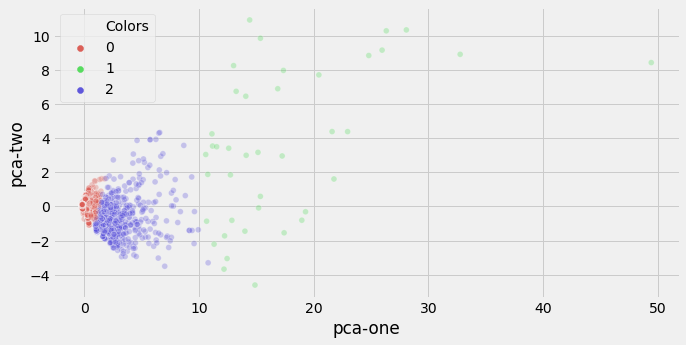

In [84]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Colors",
    palette=sns.color_palette("hls", 3),
    data=pca_df,
    #palette=sns.color_palette('coolwarm', n_colors=3), 
    legend="full",
    alpha=0.3
)

### Now we do clustering by each unique label

In [57]:
df.sample(5)

,tag,owner,document,phrase,page,location,First_clustering,Segment
25167,Base-Rent-Absolute-Expense-Amount,Amirah,Coyee,"18,492.73",5,https://klondike.cbre.cloud/labeler?identifier...,2,Third
18785,Execution-Date,Piyush,Donald/OCR issue. : Phase 1 and 2 attributes h...,We September 2016 day of,11,https://klondike.cbre.cloud/labeler?identifier...,2,Third
5888,Property-City,(not set),Coyee,Temple Terrace,4,https://klondike.cbre.cloud/labeler?identifier...,2,Third
26518,Absolute-Lease-Term,Amirah,Coyee,Ten ( 10 ) Years,1,https://klondike.cbre.cloud/labeler?identifier...,2,Third
14654,Lessee-Contact-Street,Ramana,Ramana/Piyush/PF1/Piyush,6 Stuart Road,2,https://klondike.cbre.cloud/labeler?identifier...,2,Third


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
from tqdm import tqdm

In [66]:
inertias_list = []

for attribute in tqdm(df["tag"].unique()):
    try:
        vectorizer = CountVectorizer()
        vector = vectorizer.fit_transform(df.loc[df["tag"] == attribute, "phrase"])

        kmeans = KMeans(
        init = "random",
        n_clusters = 1,
        n_init = 4,
        max_iter = 50,
        random_state = 42
        )

        kmeans.fit(vector)
        
        current_inertia = kmeans.inertia_
    except:
        print(attribute, len(df.loc[df["tag"] == attribute, "phrase"]))
        current_inertia = 0
        
    
    inertias_list.append((attribute, current_inertia)) 
    

 40%|████████████████████████████████▎                                               | 137/339 [00:08<00:10, 18.67it/s]

Other-Currency 3


 43%|██████████████████████████████████▍                                             | 146/339 [00:08<00:09, 19.45it/s]

OPEX-Currency 1


 73%|██████████████████████████████████████████████████████████                      | 246/339 [00:15<00:06, 15.06it/s]

Insurance-Currency 2


 99%|███████████████████████████████████████████████████████████████████████████████▌| 337/339 [00:22<00:00, 13.21it/s]

Abatement-Currency 6


100%|████████████████████████████████████████████████████████████████████████████████| 339/339 [00:22<00:00, 14.91it/s]


In [68]:
summary_df = pd.DataFrame(inertias_list)
summary_df.columns = ["Attribute", "Inertia"]

In [72]:
pd.set_option('display.max_rows', None)

In [73]:
summary_df.sort_values(["Inertia"], ascending = False)

,Attribute,Inertia
174,Lessor-Contact-Organization,5023.733138
210,Lessee-Contact-Organization,4465.434415
269,Clause-Surrender-Or-Reinstatement,3514.500000
313,Base-Rent-Absolute-Expense-Amount,3123.431991
110,Property-Street,3083.848518
80,Relative-Commencement-Date,3010.666667
284,Clause-Building-Insurance-TT,2852.285714
305,Base-Rent-Relative-Expense-Amount,2623.408264
79,Relative-Execution-Date,2323.733746
265,Effective-Date,2259.324965


### Now we try to use word embeddings to vectorize the phrases first and then cluster

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SPeruri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
sentences = df["phrase"]

In [7]:
# Tokenization of each document
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['monthly'],
 ['rental',
  '.',
  'the',
  'monthly',
  'rental',
  'for',
  'the',
  'premises',
  '(',
  '“',
  'rent',
  ')',
  'during',
  'the',
  'first',
  'year',
  'of',
  'this',
  'tenant',
  'in',
  'advance'],
 ['2',
  '.',
  'lease',
  'shall',
  'be',
  'the',
  'sum',
  'of',
  'three',
  'thousand',
  'dollars',
  '(',
  ')',
  'per',
  'plus',
  'florida',
  'state',
  'sales',
  'tax',
  ',',
  'which',
  'is',
  'currently',
  '7',
  '%',
  'making',
  'the',
  'total',
  'rent',
  'which',
  'shall',
  'be',
  'paid',
  'by',
  'on',
  'the',
  'first',
  'day',
  'of',
  'each',
  'month',
  '.',
  'if',
  'tenant',
  'shall',
  'have',
  'failed',
  'to',
  'pay',
  'rent',
  'provided'],
 ['$', '3,210.00'],
 ['commencement', 'date'],
 ['the', 'lease', 'commencement', 'date'],
 ['commencement', 'date'],
 ['its', 'proportionate', 'share'],
 ['with', 'payment', 'of', 'the', 'base', 'rent'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['c

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data[:2]

C:\Users\SPeruri\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[TaggedDocument(words=['monthly'], tags=[0]),
 TaggedDocument(words=['rental', '.', 'the', 'monthly', 'rental', 'for', 'the', 'premises', '(', '“', 'rent', ')', 'during', 'the', 'first', 'year', 'of', 'this', 'tenant', 'in', 'advance'], tags=[1])]

In [10]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 25, window = 2, min_count = 1, epochs = 5)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

'\nvector_size = Dimensionality of the feature vectors.\nwindow = The maximum distance between the current and predicted word within a sentence.\nmin_count = Ignores all words with total frequency lower than this.\nalpha = The initial learning rate.\n'

In [11]:
## Print model vocabulary

model.wv.index_to_key[:30]

[',',
 'the',
 '.',
 'of',
 '(',
 ')',
 '$',
 'and',
 'inc',
 'day',
 '1',
 'month',
 'to',
 'square',
 'first',
 'llc',
 'date',
 'feet',
 'lease',
 'suite',
 'year',
 '-',
 'or',
 'term',
 'months',
 'drive',
 'tenant',
 'this',
 'monthly',
 'company']

In [24]:
tokenized_sent

[['monthly'],
 ['rental',
  '.',
  'the',
  'monthly',
  'rental',
  'for',
  'the',
  'premises',
  '(',
  '“',
  'rent',
  ')',
  'during',
  'the',
  'first',
  'year',
  'of',
  'this',
  'tenant',
  'in',
  'advance'],
 ['2',
  '.',
  'lease',
  'shall',
  'be',
  'the',
  'sum',
  'of',
  'three',
  'thousand',
  'dollars',
  '(',
  ')',
  'per',
  'plus',
  'florida',
  'state',
  'sales',
  'tax',
  ',',
  'which',
  'is',
  'currently',
  '7',
  '%',
  'making',
  'the',
  'total',
  'rent',
  'which',
  'shall',
  'be',
  'paid',
  'by',
  'on',
  'the',
  'first',
  'day',
  'of',
  'each',
  'month',
  '.',
  'if',
  'tenant',
  'shall',
  'have',
  'failed',
  'to',
  'pay',
  'rent',
  'provided'],
 ['$', '3,210.00'],
 ['commencement', 'date'],
 ['the', 'lease', 'commencement', 'date'],
 ['commencement', 'date'],
 ['its', 'proportionate', 'share'],
 ['with', 'payment', 'of', 'the', 'base', 'rent'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['monthly'],
 ['c

In [43]:
corpus_vectorised = []

for sentence in tokenized_sent:

    if len(sentence) == 1:
        new_sent = [sentence[0]]
    else:
        new_sent = [" ".join(sentence)]
    
    test_doc = word_tokenize(new_sent[0])
    test_doc_vector = model.infer_vector(test_doc)
    
    corpus_vectorised.append(list(test_doc_vector))

In [44]:
corpus_vectorised[:3]

[[-0.0036706827,
  0.014289895,
  0.0128851365,
  -0.02900928,
  -0.014562707,
  0.011861844,
  -0.02284754,
  -0.0032564898,
  -0.007645212,
  -0.03635989,
  0.018565085,
  -0.0033106755,
  -0.011007977,
  0.0014419702,
  -0.00896991,
  0.013478667,
  -0.0032318272,
  0.012300169,
  0.0035845782,
  0.026172474,
  0.022839833,
  -0.0031319843,
  0.017369062,
  0.023318462,
  0.011161402],
 [0.0007147965,
  0.04437608,
  -0.02544003,
  0.020207362,
  -0.064766966,
  -0.009189005,
  -0.07746559,
  -0.014912699,
  0.07241674,
  -0.054336295,
  -0.027644007,
  -0.011438919,
  0.015722524,
  0.016940346,
  -0.0358762,
  -0.05494599,
  0.024939029,
  -0.059340205,
  -0.0075954366,
  -0.017644994,
  0.025023138,
  -0.0065412857,
  0.022835845,
  0.08731078,
  -0.03409033],
 [-0.06035124,
  -0.021098193,
  -0.024278993,
  -0.061732266,
  -0.15611461,
  0.05001964,
  -0.15418784,
  -0.058997206,
  0.1386543,
  -0.19780667,
  -0.017903527,
  -0.079569414,
  0.038279105,
  0.065665804,
  -0.07583

In [47]:
# For full dataset
kmeans_kwargs = {
    "init": "random",
    "n_init": 3,
    "max_iter": 30,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):     
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(corpus_vectorised)
    sse.append(kmeans.inertia_)

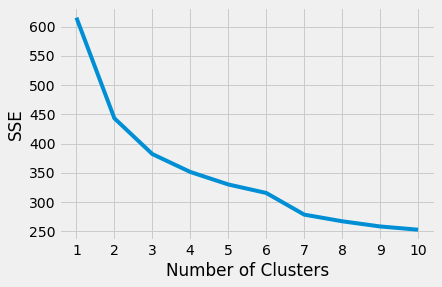

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [49]:
# Using 3 clusters
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=4,
    max_iter=50,
    random_state=42
)

kmeans.fit(corpus_vectorised)

KMeans(init='random', max_iter=50, n_clusters=3, n_init=4, random_state=42)

In [50]:
kmeans.labels_

array([2, 2, 1, ..., 2, 2, 2])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28050 samples in 0.483s...
[t-SNE] Computed neighbors for 28050 samples in 99.661s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28050
[t-SNE] Computed conditional probabilities for sample 2000 / 28050
[t-SNE] Computed conditional probabilities for sample 3000 / 28050
[t-SNE] Computed conditional probabilities for sample 4000 / 28050
[t-SNE] Computed conditional probabilities for sample 5000 / 28050
[t-SNE] Computed conditional probabilities for sample 6000 / 28050
[t-SNE] Computed conditional probabilities for sample 7000 / 28050
[t-SNE] Computed conditional probabilities for sample 8000 / 28050
[t-SNE] Computed conditional probabilities for sample 9000 / 28050
[t-SNE] Computed conditional probabilities for sample 10000 / 28050
[t-SNE] Computed conditional probabilities for sample 11000 / 28050
[t-SNE] Computed conditional probabilities for sample 12000 / 28050
[t-SNE] Computed conditional probabilities for sa

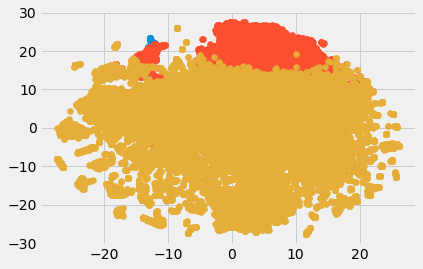

In [51]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, n_iter=500)
tsne = tsne_model.fit_transform(corpus_vectorised)
tsne = pd.DataFrame(tsne)
tsne['k'] = kmeans.labels_

for cluster in np.unique(kmeans.labels_): # plot data by cluster
    plt.scatter(x=tsne.where(tsne['k']==cluster)[0],
                y=tsne.where(tsne['k']==cluster)[1]
               )

Explained variation per principal component: [0.51739138 0.15212081]


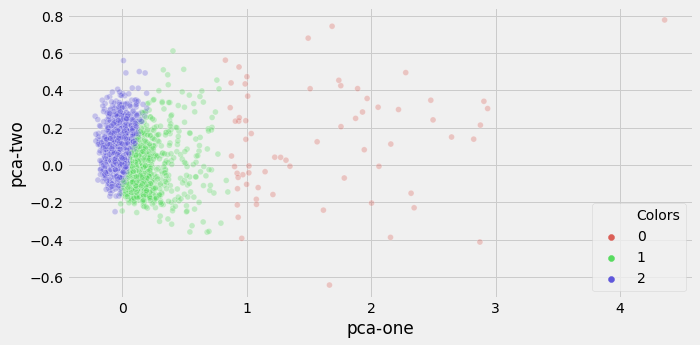

In [52]:
from sklearn.decomposition import PCA

# Visualizing using PCA
pca_df = pd.DataFrame()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(corpus_vectorised)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca_df["Colors"] = kmeans.labels_

plt.figure(figsize=(10,5))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Colors",
    palette=sns.color_palette("hls", 3),
    data=pca_df,
    #palette=sns.color_palette('coolwarm', n_colors=3), 
    legend="full",
    alpha=0.3
)

In [63]:
vectorised_series = pd.Series(corpus_vectorised)

### Clustering for each label

In [76]:
# Now for each label

from tqdm import tqdm

inertias_list = []

for attribute in tqdm(df["tag"].unique()):
    try:
        # FInd the indices for the current attribute
        condition_1 = df["tag"] == attribute
        all_indices = []
        for index, value in enumerate(condition_1):
            if value:
                all_indices.append(index)
                
        current_series = vectorised_series.loc[all_indices].reset_index(drop = True)
        
        vector = []
        for element in current_series:
            vector.append(element)

        kmeans = KMeans(
        init = "random",
        n_clusters = 1,
        n_init = 4,
        max_iter = 50,
        random_state = 42
        )

        kmeans.fit(vector)
        
        current_inertia = kmeans.inertia_
    except:
        print(attribute, len(df.loc[df["tag"] == attribute, "phrase"]))
        current_inertia = 0
        
    
    inertias_list.append((attribute, current_inertia)) 
    

summary_df = pd.DataFrame(inertias_list)
summary_df.columns = ["Attribute", "Inertia"]

pd.set_option('display.max_rows', None)

summary_df.sort_values(["Inertia"], ascending = False)

100%|████████████████████████████████████████████████████████████████████████████████| 339/339 [01:20<00:00,  4.20it/s]


,Attribute,Inertia
269,Clause-Surrender-Or-Reinstatement,17.764888
174,Lessor-Contact-Organization,17.522945
210,Lessee-Contact-Organization,14.626130
284,Clause-Building-Insurance-TT,14.153620
80,Relative-Commencement-Date,11.944349
278,Clause-Maintenance-Repairs,10.693922
110,Property-Street,9.413770
279,Clause-Late-Charge,9.385005
313,Base-Rent-Absolute-Expense-Amount,8.379387
79,Relative-Execution-Date,8.335897
